
# Hypertension Risk Prediction using Machine Learning

In this notebook, we develop and evaluate two machine learning models:
- Logistic Regression (Baseline)
- Multi-Layer Perceptron (Target Model)
    

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
    

In [3]:

# Load dataset
data = pd.read_csv('/Users/rumic/Learn/Hypertension-risk-model-main.csv')

# Display basic information about the dataset
print(data.info())
print(data.describe())
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB
None
              male          age  currentSmoker   cigsPerDay       BPMeds  \
count  4240.000000  4240.000000    4240.000000  4211.000000  4187.000000   
mean      0.429245    49

In [11]:
# Data preprocessing
# 1. Handling missing values
data = data.dropna()  # Drop rows with missing values

# 2. Feature selection (retain 13 features)
features = ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
            'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
target = 'Risk'

X = data[features]
y = data[target]

# 3. Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
    

In [13]:

# Splitting data (70:15:15)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    

In [15]:

# Baseline model: Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Metrics for Logistic Regression
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_log):.4f}")
    

Logistic Regression Metrics:
Accuracy: 0.8703
Precision: 0.8462
Recall: 0.7293
F1 Score: 0.7834


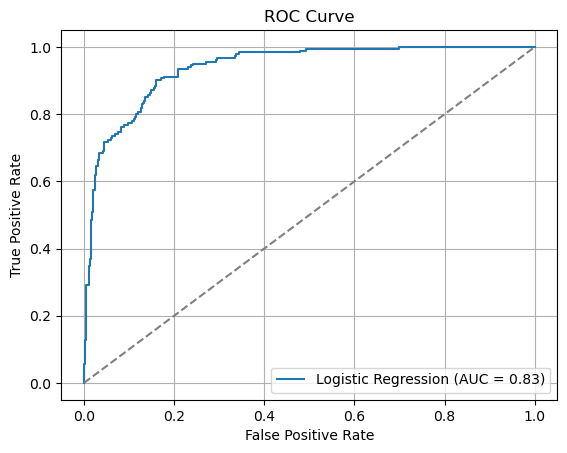

In [17]:

# ROC curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_log)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()
    

In [29]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Target model: Multi-Layer Perceptron (MLP)
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 64),      
    activation='relu',                
    solver='adam',                   
    max_iter=300,                     
    random_state=42,                  
    early_stopping=True,              
    validation_fraction=0.15,         
    alpha=0.0001                      
)

# Fit the model to the training data
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp.predict(X_test)

# Evaluate metrics for MLP
print("\nOptimized MLP Classifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_mlp):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_mlp):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_mlp):.4f}")

    


Optimized MLP Classifier Metrics:
Accuracy: 0.8703
Precision: 0.8253
Recall: 0.7569
F1 Score: 0.7896


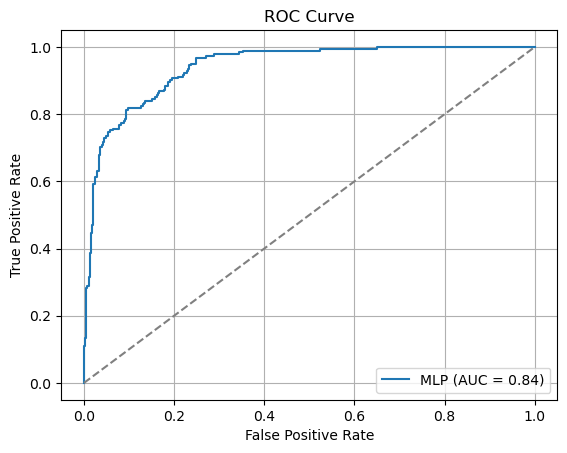

In [31]:

# ROC curve for MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
roc_auc_mlp = roc_auc_score(y_test, y_pred_mlp)
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()
    

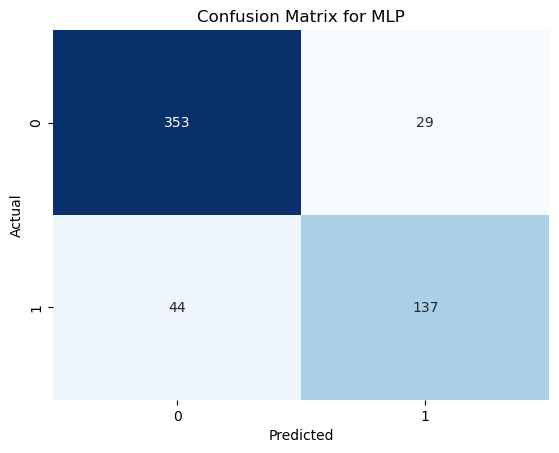

In [33]:

# Confusion matrix for MLP
cm = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for MLP")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
    